In [28]:
#importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [29]:
# 1. Import the dataset
df = pd.read_csv('Titanic-Dataset.csv')

In [30]:
#exploring basic info
print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [31]:
#data types and non null counts

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [32]:
# 2. Handle missing values using mean/median/imputation.

# Analyze missing values (based on df.info() before imputation):
# - 'Age': Numerical, using the median for robustness against outliers.
# - 'Cabin': Categorical/String, using a placeholder 'Unknown' as most are missing.
# - 'Embarked': Categorical, using the mode (most frequent value) as only 2 are missing.

# Impute 'Age' with the median
median_age = df['Age'].median()
df['Age'].fillna(median_age, inplace=True)

# Impute 'Cabin' with 'Unknown'
df['Cabin'].fillna('Unknown', inplace=True)

# Impute 'Embarked' with the mode
mode_embarked = df['Embarked'].mode()[0]
df['Embarked'].fillna(mode_embarked, inplace=True)

print("\n--- Data Information After Imputation (Task 2) ---")
print("\nData types and missing values (after imputation):")
print(df.info())


--- Data Information After Imputation (Task 2) ---

Data types and missing values (after imputation):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


/tmp/ipython-input-1956650245.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(median_age, inplace=True)
/tmp/ipython-input-1956650245.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 

In [33]:
# Identify high-cardinality and non-essential features to drop for basic preprocessing
df.drop(['Name', 'Ticket', 'Cabin', 'PassengerId'], axis=1, inplace=True)

# Convert 'Sex' and 'Embarked' using One-Hot Encoding
# 'drop_first=True' is used to avoid multicollinearity.
df_encoded = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)

In [34]:
# Identify numerical columns for scaling (excluding binary/target columns)
numerical_features = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the identified numerical features
df_encoded[numerical_features] = scaler.fit_transform(df_encoded[numerical_features])

print("DataFrame after Standardization")
print(df_encoded.head())

DataFrame after Standardization
   Survived    Pclass       Age     SibSp     Parch      Fare  Sex_male  \
0         0  0.827377 -0.565736  0.432793 -0.473674 -0.502445      True   
1         1 -1.566107  0.663861  0.432793 -0.473674  0.786845     False   
2         1  0.827377 -0.258337 -0.474545 -0.473674 -0.488854     False   
3         1 -1.566107  0.433312  0.432793 -0.473674  0.420730     False   
4         0  0.827377  0.433312 -0.474545 -0.473674 -0.486337      True   

   Embarked_Q  Embarked_S  
0       False        True  
1       False       False  
2       False        True  
3       False        True  
4       False        True  


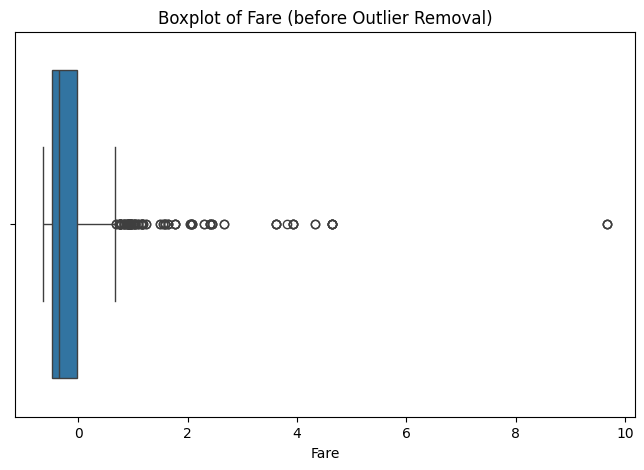


Original DataFrame Size: 891
DataFrame Size After Outlier Removal: 775


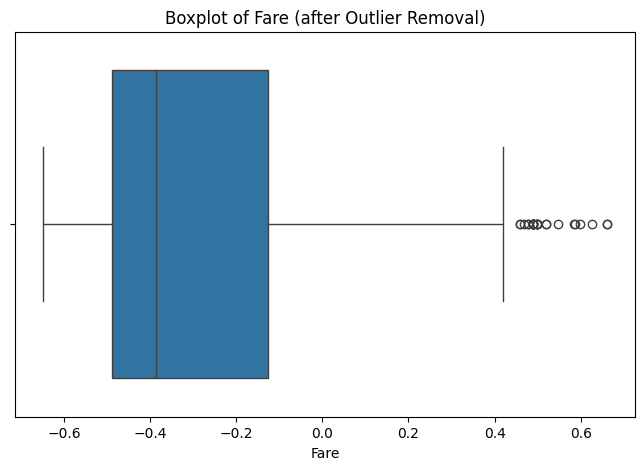

In [35]:
# Visualize Outliers
plt.figure(figsize=(8, 5))
sns.boxplot(x=df_encoded['Fare'])
plt.title('Boxplot of Fare (before Outlier Removal)')
plt.show()

# Remove Outliers using the IQR method (e.g., in Fare column) ---

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df_encoded['Fare'].quantile(0.25)
Q3 = df_encoded['Fare'].quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Define the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers (keep only values within the bounds)
df_filtered = df_encoded[
    (df_encoded['Fare'] >= lower_bound) & (df_encoded['Fare'] <= upper_bound)
].copy()

print(f"\nOriginal DataFrame Size: {len(df_encoded)}")
print(f"DataFrame Size After Outlier Removal: {len(df_filtered)}")

# Visualize Boxplot after removal (Optional check) ---
plt.figure(figsize=(8, 5))
sns.boxplot(x=df_filtered['Fare'])
plt.title('Boxplot of Fare (after Outlier Removal)')
plt.show()